In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from IPython.display import display

In [2]:
df = pd.read_csv("spotify-2023.csv", encoding='latin-1')

In [38]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams_numeric
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,141381703.0
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,133716286.0
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,140003974.0
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,800840817.0
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,303236322.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,91473363.0
948,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,121871870.0
949,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,73513683.0
950,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,133895612.0


In [3]:
# Replace the null values by 0
df['in_shazam_charts'].fillna(df['in_shazam_charts'].mean(), inplace=True)
df['key'].fillna(0, inplace=True)

df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [4]:
# Let's check if 'streams' column has any non-numerical values

df['streams_numeric'] = pd.to_numeric(df['streams'], errors='coerce')
non_numeric_rows = df[df['streams_numeric'].isna()]

display(non_numeric_rows)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams_numeric
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,A,Major,53,75,69,7,0,17,3,NaN


In [5]:
# Dropping the row
df.drop(574, axis=0, inplace=True)

df.reset_index(drop=True, inplace=True)

In [6]:
df["streams"] = df["streams"].astype('int64')

In [7]:
artist_count=df["artist(s)_name"].value_counts()
more_than_5_realease=artist_count[artist_count > 5]

In [8]:
artist_count

Taylor Swift          34
The Weeknd            22
Bad Bunny             19
SZA                   19
Harry Styles          17
                      ..
Coolio, L.V.           1
Kordhell               1
Kenia OS               1
Feid, Mora             1
Feid, Sech, Jhayco     1
Name: artist(s)_name, Length: 644, dtype: int64

In [9]:
artist_5_nameList= more_than_5_realease.index.to_list()

Text(0.5, 1.0, 'Artists with 5 or more Releases')

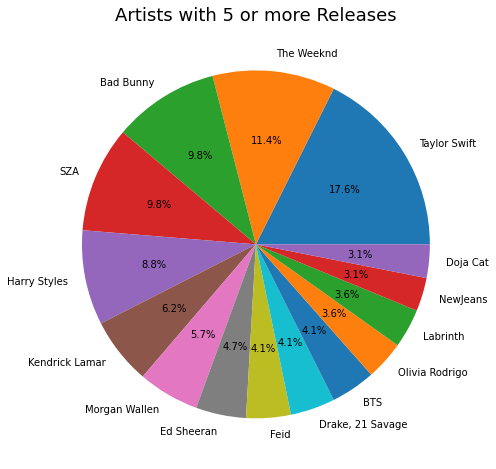

In [10]:
plt.figure(figsize=(8,8))
plt.pie(more_than_5_realease, labels=artist_5_nameList,autopct='%1.1f%%')
plt.title("Artists with 5 or more Releases",fontsize=18,fontweight=8)


In [11]:
released_year_count=df["released_year"].value_counts()
released_after_2000=released_year_count[released_year_count.index>2000]

In [12]:
YearList_greaterThan2000= released_after_2000.index.to_list()

Text(0, 0.5, 'Number of Songs')

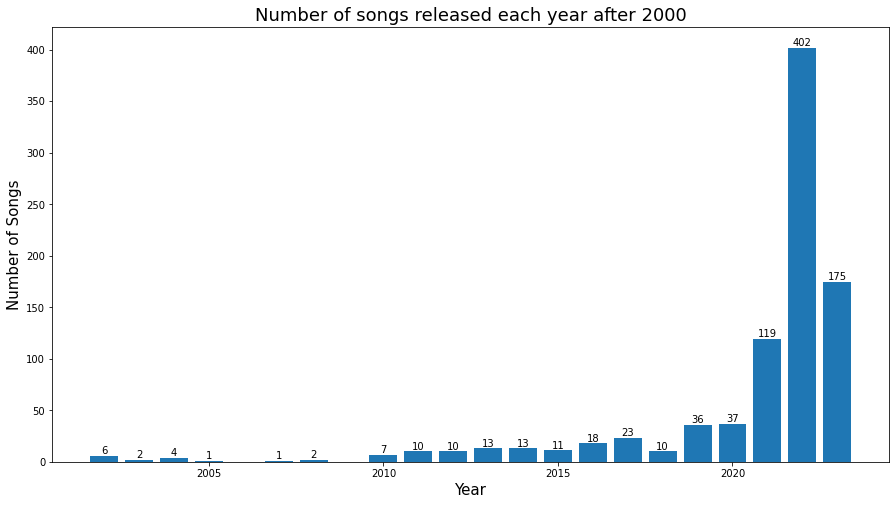

In [13]:
plt.figure(figsize=(15,8))
plt.bar(YearList_greaterThan2000, released_after_2000.values.tolist())
for i, value in enumerate(released_after_2000.values.tolist()):
    plt.text(YearList_greaterThan2000[i], value, str(value), ha='center', va='bottom')
plt.title("Number of songs released each year after 2000",fontsize=18)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Number of Songs",fontsize=15)

In [14]:
df.sort_values(by='streams', ascending=False)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams_numeric
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,C#,Major,50,38,80,0,0,9,7,3.703895e+09
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,C#,Minor,83,93,65,58,0,9,8,3.562544e+09
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,C#,Major,50,45,41,75,0,11,3,2.887242e+09
619,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,F#,Minor,82,54,59,69,0,18,10,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,D,Major,76,91,50,54,0,7,5,2.808097e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Overdrive,Post Malone,1,2023,7,14,410,36,14780425,36,...,C#,Major,56,48,73,0,0,35,4,1.478042e+07
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,11956641,5,...,B,Minor,93,68,65,42,0,12,25,1.195664e+07
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,2023,7,13,437,31,11599388,17,...,0,Major,79,92,89,5,0,6,5,1.159939e+07
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,2022,12,22,138,4,1365184,13,...,G,Major,82,62,74,10,0,33,7,1.365184e+06


In [15]:
streams_desc=df.sort_values(by='streams', ascending=False)

In [16]:
top_10_streamsName=streams_desc.head(10)

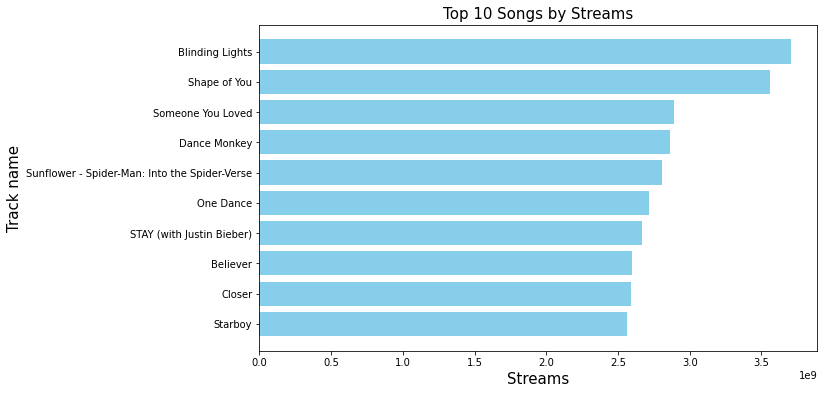

In [17]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_streamsName['track_name'], top_10_streamsName['streams'], color='skyblue')
plt.xlabel('Streams', fontsize=15)
plt.ylabel('Track name', fontsize=15)
plt.title('Top 10 Songs by Streams', fontsize=15)
plt.gca().invert_yaxis()


plt.show()

In [18]:
# Calculating the sum of streams, and displaying the 10 most streamed artists
artist_streams = df.groupby('artist(s)_name')['streams'].sum()

most_streamed_artist = artist_streams.sort_values(ascending=False).head(10)

for artist, streams in most_streamed_artist.items():
    print(f"{artist}: {streams} total streams")

The Weeknd: 14185552870 total streams
Taylor Swift: 14053658300 total streams
Ed Sheeran: 13908947204 total streams
Harry Styles: 11608645649 total streams
Bad Bunny: 9997799607 total streams
Olivia Rodrigo: 7442148916 total streams
Eminem: 6183805596 total streams
Bruno Mars: 5846920599 total streams
Arctic Monkeys: 5569806731 total streams
Imagine Dragons: 5272484650 total streams


In [19]:
artist_streams

artist(s)_name
(G)I-DLE                                          266983330
21 Savage, Gunna                                   60680939
24kgoldn, Iann Dior                              1699402402
50 Cent                                          1202722675
A$AP Rocky, Metro Boomin, Roisee                   94186466
                                                    ...    
j-hope                                            155795783
j-hope, J. Cole                                   116599790
sped up 8282                                      103762518
sped up nightcore, ARIZONATEARS, Lil Uzi Vert     207033255
teto                                              139193812
Name: streams, Length: 644, dtype: int64

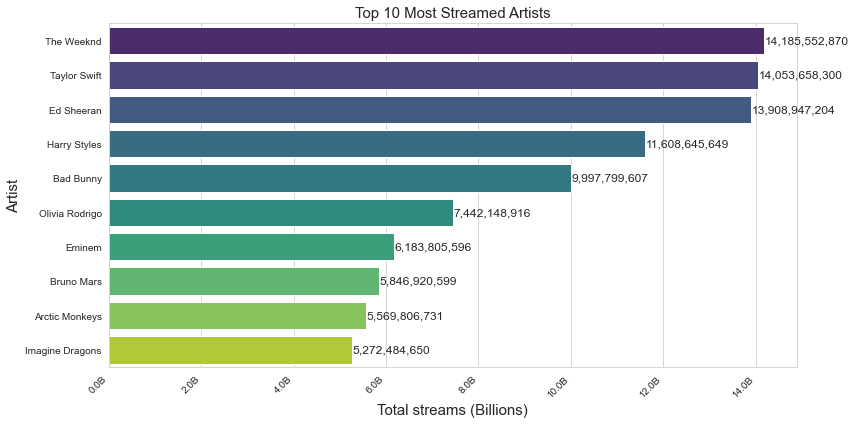

In [20]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x=most_streamed_artist.values, y=most_streamed_artist.index, palette='viridis')

plt.xlabel('Total streams (Billions)', fontsize=15)
plt.ylabel('Artist', fontsize=15)
plt.title('Top 10 Most Streamed Artists', fontsize=15)
plt.xticks(rotation=45, ha='right')
formatter = ticker.FuncFormatter(lambda x, pos: f'{x / 1e9:.1f}B')
ax.xaxis.set_major_formatter(formatter)
for i, v in enumerate(most_streamed_artist.values):
    ax.text(v + 10000000, i, f'{v:,}', va='center', fontsize=12)
plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'BPM Summary Statistics')

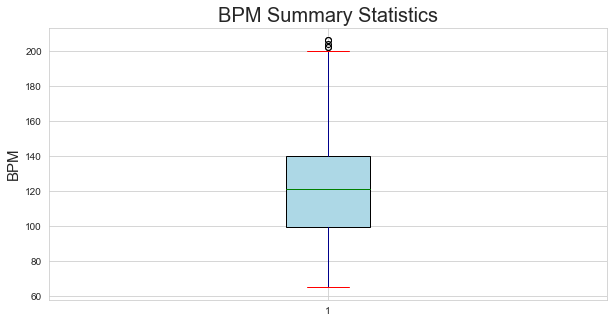

In [21]:
#boxprops = dict(facecolor='lightblue')
plt.figure(figsize=(10, 5))
boxplot=plt.boxplot(df['bpm'], vert=True, patch_artist=True)
box_color = 'lightblue'
whisker_color = 'darkblue'
cap_color = 'red'
median_color = 'green'
for box in boxplot['boxes']:
    box.set(facecolor=box_color)
for whisker in boxplot['whiskers']:
    whisker.set(color=whisker_color)
for cap in boxplot['caps']:
    cap.set(color=cap_color)
for median in boxplot['medians']:
    median.set(color=median_color)
plt.ylabel("BPM",fontsize=15)
plt.title("BPM Summary Statistics",fontsize=20, fontweight=10)

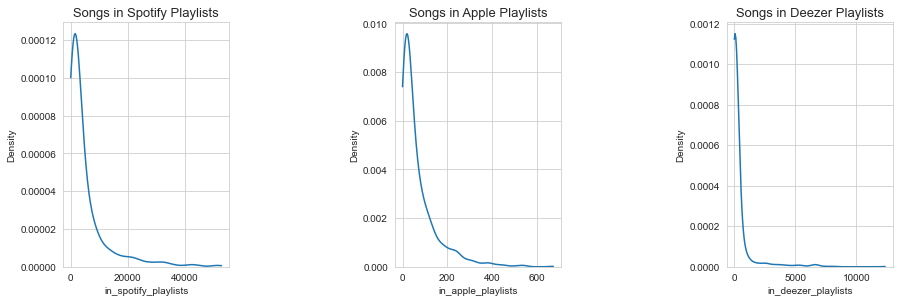

In [22]:
fig,axes = plt.subplots(1,3)

sns.kdeplot(df["in_spotify_playlists"], ax=axes[0],cut=0)
axes[0].set_title("Songs in Spotify Playlists",fontsize=13)

sns.kdeplot(df["in_apple_playlists"], ax=axes[1],cut=0)
axes[1].set_title("Songs in Apple Playlists",fontsize=13)

sns.kdeplot(df["in_deezer_playlists"], ax=axes[2],cut=0)
axes[2].set_title("Songs in Deezer Playlists",fontsize=13)

fig.subplots_adjust(left=0.08, right=2, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=1)
#ax[0].set_ylim(0, 5000)
plt.show()

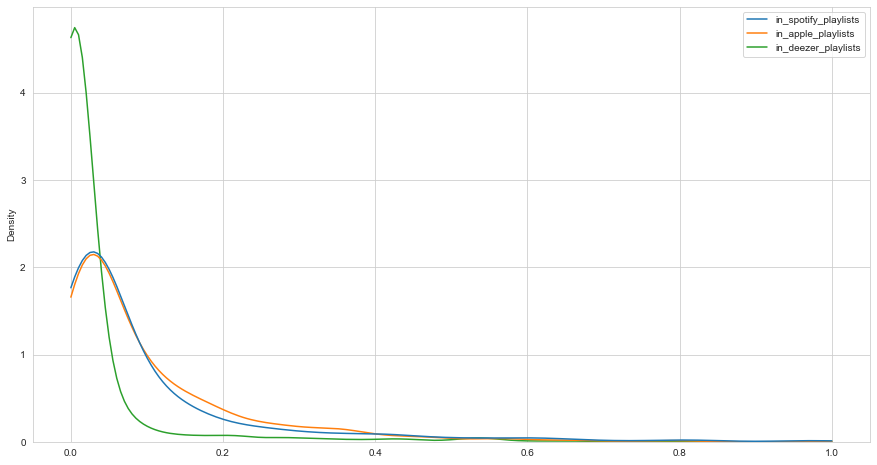

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Extract the columns you want to normalize
data_to_normalize = df[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the data between 0 and 1
normalized_data = scaler.fit_transform(data_to_normalize)

# Convert the normalized data to a DataFrame for plotting
normalized_df = pd.DataFrame(normalized_data, columns=data_to_normalize.columns)

# Plot the KDE of all three columns in one graph
plt.figure(figsize=(15, 8))
sns.kdeplot(data=normalized_df, cut=0)
plt.show()

In [24]:
normalized_df

,in_spotify_playlists,in_apple_playlists,in_deezer_playlists
0,0.009874,0.063988,0.003639
1,0.027295,0.071429,0.004690
2,0.025838,0.139881,0.007358
3,0.148051,0.172619,0.010108
4,0.058676,0.125000,0.007035
...,...,...,...
947,0.017440,0.090774,0.002992
948,0.021734,0.005952,0.000647
949,0.010252,0.002976,0.000566
950,0.024382,0.043155,0.001375


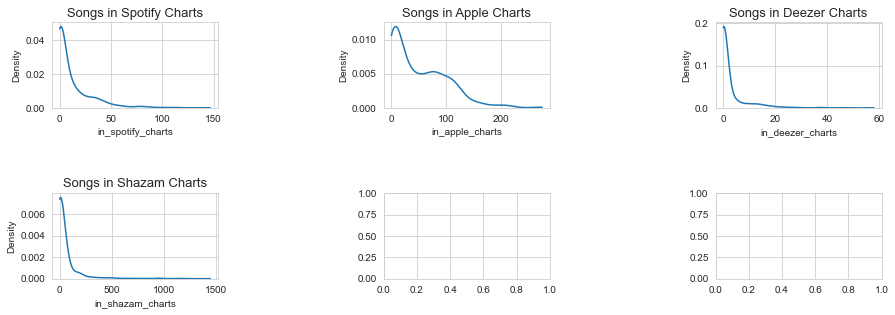

In [25]:
fig,axes = plt.subplots(2,3)

sns.kdeplot(df["in_spotify_charts"], ax=axes[0,0],cut=0)
axes[0,0].set_title("Songs in Spotify Charts",fontsize=13)

sns.kdeplot(df["in_apple_charts"], ax=axes[0,1], cut=0)
axes[0,1].set_title("Songs in Apple Charts",fontsize=13)

sns.kdeplot(df["in_deezer_charts"], ax=axes[0,2], cut=0)
axes[0,2].set_title("Songs in Deezer Charts",fontsize=13)

sns.kdeplot(df["in_shazam_charts"], ax=axes[1,0], cut=0)
axes[1,0].set_title("Songs in Shazam Charts",fontsize=13)
fig.subplots_adjust(left=0.08, right=2, bottom=0.01, top=0.9,hspace=1, wspace=1)

plt.show()

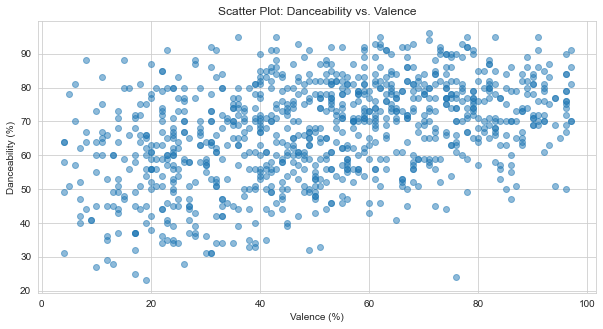

In [26]:
# Danceability and valecity correlation 
plt.figure(figsize=(10,5))
plt.scatter(df['valence_%'], df['danceability_%'], alpha=0.5)
plt.xlabel('Valence (%)')
plt.ylabel('Danceability (%)')
plt.title('Scatter Plot: Danceability vs. Valence')
plt.grid(True)
plt.show()

In [27]:
# Printing the correlation between Danceability and Valence
correlation_coefficient = df['valence_%'].corr(df['danceability_%'])
print(f'Correlation Coefficient: {correlation_coefficient}')

Correlation Coefficient: 0.40987279921202485


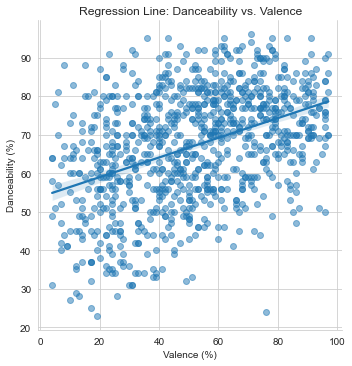

In [28]:
# Adding the regression line to the correlation chart

sns.lmplot(x='valence_%', y='danceability_%', data=df, scatter_kws={'alpha': 0.5})
plt.xlabel('Valence (%)')
plt.ylabel('Danceability (%)')
plt.title('Regression Line: Danceability vs. Valence')
plt.grid(True)
plt.show()

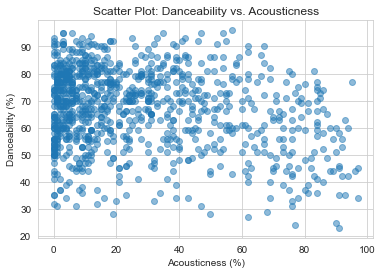

In [29]:
# Danceability and acousticness correlation 
plt.scatter(df['acousticness_%'], df['danceability_%'], alpha=0.5)
plt.xlabel('Acousticness (%)')
plt.ylabel('Danceability (%)')
plt.title('Scatter Plot: Danceability vs. Acousticness')
plt.grid(True)
plt.show()

In [30]:
correlation_coefficient = df['acousticness_%'].corr(df['danceability_%'])
print(f'Correlation Coefficient: {correlation_coefficient}')

Correlation Coefficient: -0.23712804263530993


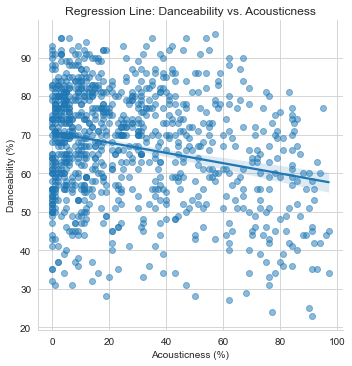

In [31]:
# Adding the regression line to the chart again
sns.lmplot(x='acousticness_%', y='danceability_%', data=df, scatter_kws={'alpha': 0.5})
plt.xlabel('Acousticness (%)')
plt.ylabel('Danceability (%)')
plt.title('Regression Line: Danceability vs. Acousticness')
plt.grid(True)
plt.show()

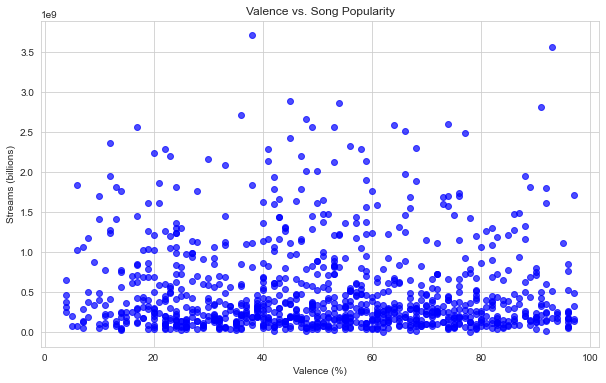

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df['valence_%'], df['streams'], c='blue', alpha=0.7, marker='o')
plt.xlabel('Valence (%)')
plt.ylabel('Streams (billions)')
plt.title('Valence vs. Song Popularity')
plt.show()

In [33]:
# Printing the correlation between Valence and streams
valence_correlation = df['valence_%'].corr(df['streams'])

print(f'Valence vs. Streams Correlation: {valence_correlation}')


Valence vs. Streams Correlation: -0.04083136749515942


C:\Users\shaur\AppData\Local\Temp\ipykernel_13128\535077402.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  h = ax2.hist2d(df[x], df[y], bins=20)
C:\Users\shaur\AppData\Local\Temp\ipykernel_13128\535077402.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(h[3], ax=ax2)


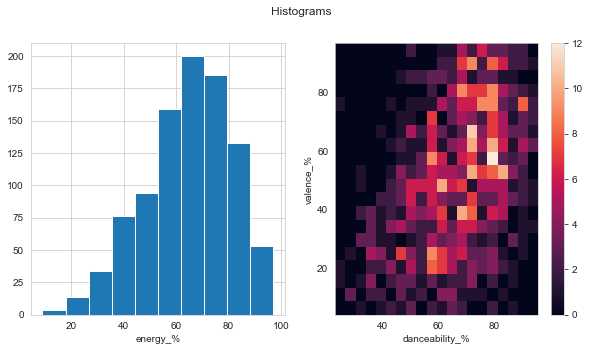

In [34]:
x = "danceability_%"
y = "valence_%"

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(10, 5))
fig.suptitle("Histograms")
h = ax2.hist2d(df[x], df[y], bins=20)
ax1.hist(df["energy_%"])

ax2.set_xlabel(x)
ax2.set_ylabel(y)

ax1.set_xlabel("energy_%")

plt.colorbar(h[3], ax=ax2)

plt.show()

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
chosen = [ "liveness_%", "valence_%", "speechiness_%", "acousticness_%", "danceability_%", "instrumentalness_%"]
text1 = df["artist(s)_name"] + " - " + df["track_name"]
text2 = text1.values
X = df[chosen].values
y = df["danceability_%"].values
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=5,
        color=y
    ))
fig = go.Figure(data=[trace])
py.iplot(fig, filename="test-graph")